# Project 3 - Investigate a Dataset: IMDB movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set selected for analysis is the movie database. There are many variables on which to identify trends including vote ratings, year of release and revenue generated as examples.

The data is checked wrangled and cleaned providing a clear dataset on which to investigate. Exploratory analysis is performed on a few key areas, the primary questions investigated are:

1) Do older or newer movies perform better with respect to revenue generated, budget and vote rating?

2) Does time of year affect the revenue and popularity of a movie?

The first step imports the relevant languages in order to work with the data

In [1]:
import numpy as npb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

The raw data is loaded in the data, checked for cleanliness, and then trimmed and cleaned for analysis. The following sections keep account of the code steps taken.

### General Properties

The dataset is read and first check made of the column headers, type of data, size of array and initial statistics.

In [2]:
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

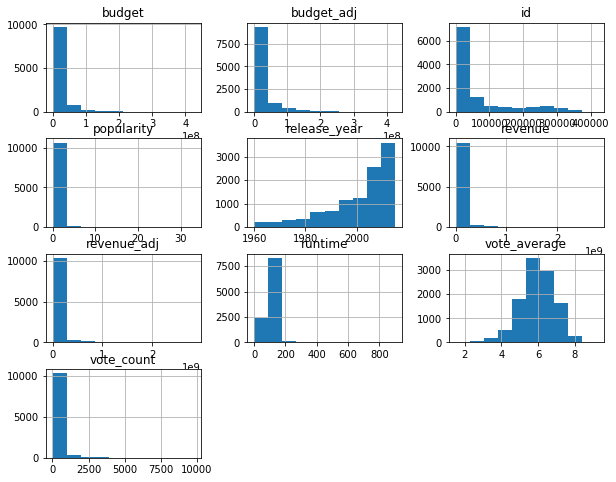

In [6]:
df.hist(figsize=(10, 8));

An initial exploration of the data is performed through 'info', 'describe' and histograms plotted show the most relevant columns to investigate and highlights the missing data. The raw data set includes 10866 rows and 21 columns. Using 'info' it is clear which columns are also missing data.

The next section details how the data is cleaned removing the unnecessary columns and either filling in missing data or removing the series where more appropriate.

### Data Cleaning

The first part of data cleaning is to remove the columns that do not hold data that could be used to provide any insight or trends. In order to have a more workable array a number of of columns are dropped which will not be used in the investigation noting id's and titles as unlikely to provide useful insight. Budget and revenue are also dropped here since an adjusted equivalent is already provided based on 2010 markets.

A quick check is made of the head of the data to confirm dropped columns. 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies'], axis=1, inplace=True)
df.head()

,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Following the drop of columns, info() is used to identify if any of the remaining data columns are missing data. A check is made on the director is null with histograms to ensure there is no obvious group missing. Given the large dataset any further 'n/a' instances are dropped from the data-set.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
cast            10790 non-null object
director        10822 non-null object
genres          10843 non-null object
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 764.1+ KB


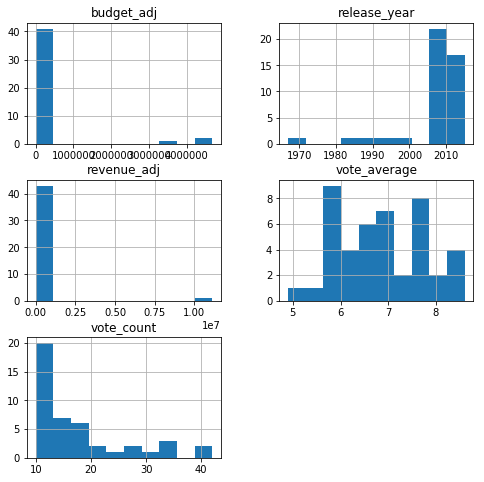

In [9]:
df[df.director.isnull()].hist(figsize=(8, 8));

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(10732, 9)

In order to identify more trends within the data and make it more manageable, a release month column is added using the datetime function and bins made to segregate the decades.

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract month from Start Time to create new column
df['release_month'] = df['release_date'].dt.month

In [13]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1964, 1970, 1980, 1990, 2000, 2010, 2016]
bin_names = ['Sixties', 'Seventies', 'Eighties', 'Nineties', 'Naughties', 'Teens']

In [14]:
# Creates decades column
df['decades'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.tail()

,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,decades
10861,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,Documentary,2066-06-15,11,7.4,1966,0.000000,0.0,6,Sixties
10862,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Action|Adventure|Drama,2066-12-21,20,5.7,1966,0.000000,0.0,12,Sixties
10863,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,Mystery|Comedy,2066-01-01,11,6.5,1966,0.000000,0.0,1,Sixties
10864,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,Action|Comedy,2066-11-02,22,5.4,1966,0.000000,0.0,11,Sixties
10865,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,Horror,2066-11-15,15,1.5,1966,127642.279154,0.0,11,Sixties


In [15]:
# Finally in the cleaning phase any potential duplicates are dropped.
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
cast             10731 non-null object
director         10731 non-null object
genres           10731 non-null object
release_date     10731 non-null datetime64[ns]
vote_count       10731 non-null int64
vote_average     10731 non-null float64
release_year     10731 non-null int64
budget_adj       10731 non-null float64
revenue_adj      10731 non-null float64
release_month    10731 non-null int64
decades          10560 non-null category
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 932.9+ KB


Plotting the scatter graphs available for the dataset to identify high level trends

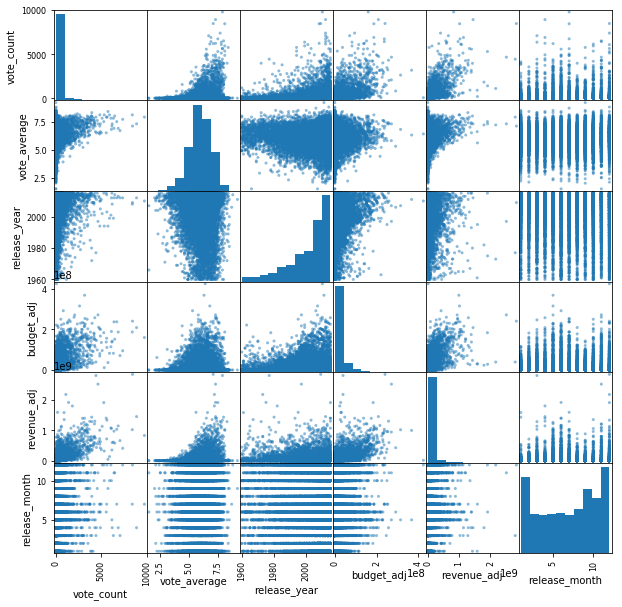

In [17]:
pd.plotting.scatter_matrix(df, figsize=(10, 10));

<a id='eda'></a>
## Exploratory Data Analysis

This section of the notebook generates statistics and visualizations to address the questions posed in the introduction of the investigation.


### Q1) Do older or newer movies perform better with respect to revenue generated, budget and vote rating?

In [18]:
# get the median release year of the data set
df.release_year.median()

2006.0

In [19]:
# select movies older than the median
older_movies = df[df.release_year < 2006]

# select movies newer than the median than or equal to the median
newer_movies = df[df.release_year >= 2006]

# ensure these queries included each sample exactly once
num_movies = df.shape[0]
num_movies == older_movies['release_year'].count() + newer_movies['release_year'].count() # should be True

True

In [20]:
# get mean vote rating for the older and younger movies groups
older_movies.vote_average.mean(), newer_movies.vote_average.mean()

(6.040672268907559, 5.8890438988095255)

The two values above would infer that older movies receive a higher vote rating than newer movies. This trend is shown in the histogram following where the blue columns represent the older movies and generally rate higher to the right of the younger movies.

In [21]:
old_movies = df.release_year < 2006
new_movies = df.release_year >= 2006

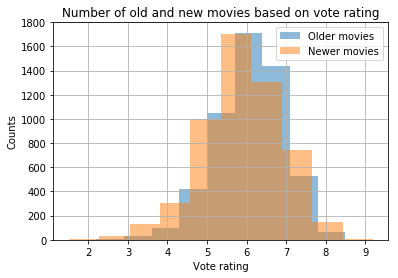

In [22]:
df.vote_average[old_movies].hist(alpha=0.5, label='Older movies')
df.vote_average[new_movies].hist(alpha=0.5, label='Newer movies')
plt.xlabel('Vote rating')
plt.ylabel('Counts')
plt.title('Number of old and new movies based on vote rating')
plt.legend();

In order to view the build-up of the movie releases with vote ratings over the last decade a combined histogram can be created.

In [23]:
sixties = df.release_year < 1970
seventies = df.release_year < 1980
eighties = df.release_year < 1990
nineties = df.release_year < 2000
naughties = df.release_year < 2010
teens = df.release_year < 2020

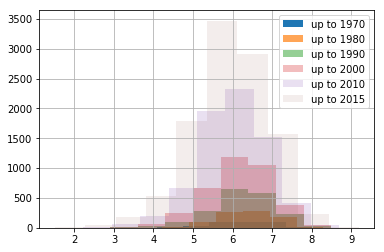

In [24]:
df.vote_average[sixties].hist(alpha=1, label='up to 1970')
df.vote_average[seventies].hist(alpha=0.7, label='up to 1980')
df.vote_average[eighties].hist(alpha=0.5, label='up to 1990')
df.vote_average[nineties].hist(alpha=0.3, label='up to 2000')
df.vote_average[naughties].hist(alpha=0.2, label='up to 2010')
df.vote_average[teens].hist(alpha=0.1, label='up to 2015')
plt.legend();

The histogram above shows the similar trend through the decades where the majority of movies have a rating of 6 and 7 with steeper drop offs merging into a wider distribution over time.

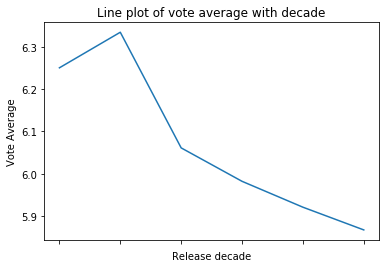

In [25]:
df.groupby('decades').mean().vote_average.plot(kind='line')
plt.xlabel('Release decade')
plt.ylabel('Vote Average')
plt.title('Line plot of vote average with decade');

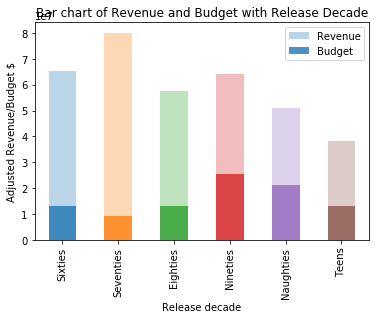

In [26]:
df.groupby('decades').mean().revenue_adj.plot(kind='bar', alpha=0.3, label='Revenue')
df.groupby('decades').mean().budget_adj.plot(kind='bar', alpha=0.8, label='Budget')
plt.xlabel('Release decade')
plt.ylabel('Adjusted Revenue/Budget $')
plt.title('Bar chart of Revenue and Budget with Release Decade')
plt.legend();

The mean revenue and budget per movie is plotted as a bar chart with decade. The darker lower section represents the budget and the lighter shade is the revenue generated. The nineties stand out as the decade with the highest budgets for movies which has steadily been decreasing to the present decade.


### Q2) How does time of year of release affect revenue and vote ratings and counts?



A series of bar charts and line plots are created to identify any trends in time of year of release.

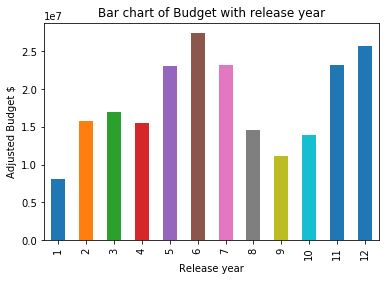

In [27]:
df.groupby('release_month').mean().budget_adj.plot(kind='bar');
plt.xlabel('Release year')
plt.ylabel('Adjusted Budget $')
plt.title('Bar chart of Budget with release year');

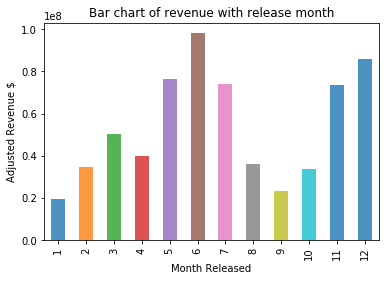

In [28]:
df.groupby('release_month').revenue_adj.mean().plot(kind='bar', alpha=0.8)
plt.xlabel('Month Released')
plt.ylabel('Adjusted Revenue $')
plt.title('Bar chart of revenue with release month');

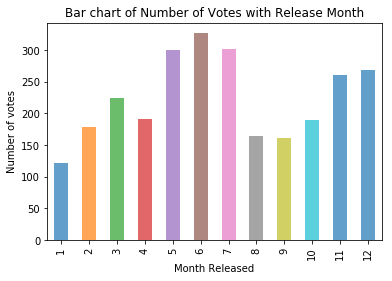

In [29]:
df.groupby('release_month').mean()['vote_count'].plot(kind='bar', alpha=0.7)
plt.xlabel('Month Released')
plt.ylabel('Number of votes')
plt.title('Bar chart of Number of Votes with Release Month');

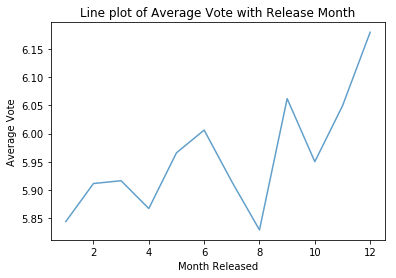

In [30]:
df.groupby('release_month').mean()['vote_average'].plot(kind='line', alpha=0.7)
plt.xlabel('Month Released')
plt.ylabel('Average Vote')
plt.title('Line plot of Average Vote with Release Month');

<a id='conclusions'></a>
## Conclusions

Two original questions werew posed on the data set, the data was cleaned, wrangled and manipulated in order to try to answer those questions. They were:

### 1) Do older or newer movies perform better with respect to revenue generated, budget and vote rating?

From the plots of the data in the histogram and line plots, older movies tend to have a higher vote rating. Calculating the median to find the centre point of the release years gave 2006. Older movies were defined as earlier than this year, newer after. The mean rating of the older movies was 6.04 compared to 5.89 for the newer movies.

The revenue, adjusted to 2010, peaked per movie in the seventies and has since been in decline, whereas budget again adjusted to 2010, peaked in the nineties and has been in decline since also. Its noted that since the nineties the ratio of budegt to revenue has remained much the same, with both decreasing together. 

These trends however do not mean that in the next decade that budget and revenue will continue to decline or that the ratings will continue to be lower also.

### 2) Does time of year affect the revenue and popularity of a movie?

Bar chart plots of revenue and budget with the month of release show a clear prominence of movies released in June and December having larger budgets and revenue. Budget is shown to be ~double in June compared to January, and revenue generated up to 5 times greater.

There is a larger number of votes made in the Summer and Winter months which correlates with higher revenues as more people may go to watch in these time periods compared. However, when looking at the vote rating with month of release we see a greater average occuring in December compared to any other month, indeed trending upward from January through to December.

Again these investigations and conclusions do not therefore mean that future releases made in the Summer or Winter months would perform any better than those in Spring or Autumn.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295